In [29]:
# Step 1: Upload dataset
from google.colab import files
uploaded = files.upload()

Saving milestone2_clustered_data.csv to milestone2_clustered_data (3).csv


In [30]:
df = pd.read_csv('milestone2_clustered_data.csv')
df.head()        # show first rows

,student_id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,reason,guardian,traveltime,studytime,failures,absences,G1,G2,G3,Cluster
0,1,0,0,0.428571,1,0,0,1.00,1.00,0,...,0,1,0.333333,0.333333,0.0,0.1250,0.000000,0.578947,0.578947,3
1,2,0,0,0.285714,1,0,1,0.25,0.25,0,...,0,0,0.000000,0.333333,0.0,0.0625,0.473684,0.578947,0.578947,2
2,3,0,0,0.000000,1,1,1,0.25,0.25,0,...,2,1,0.000000,0.333333,0.0,0.1875,0.631579,0.684211,0.631579,2
3,4,0,0,0.000000,1,0,1,1.00,0.50,1,...,1,1,0.000000,0.666667,0.0,0.0000,0.736842,0.736842,0.736842,0
4,5,0,0,0.142857,1,0,1,0.75,0.75,2,...,1,0,0.000000,0.333333,0.0,0.0000,0.578947,0.684211,0.684211,2


In [31]:

if 'Cluster' in df.columns and 'ClusterID' not in df.columns:
    df.rename(columns={'Cluster':'ClusterID'}, inplace=True)
df.head()


,student_id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,reason,guardian,traveltime,studytime,failures,absences,G1,G2,G3,ClusterID
0,1,0,0,0.428571,1,0,0,1.00,1.00,0,...,0,1,0.333333,0.333333,0.0,0.1250,0.000000,0.578947,0.578947,3
1,2,0,0,0.285714,1,0,1,0.25,0.25,0,...,0,0,0.000000,0.333333,0.0,0.0625,0.473684,0.578947,0.578947,2
2,3,0,0,0.000000,1,1,1,0.25,0.25,0,...,2,1,0.000000,0.333333,0.0,0.1875,0.631579,0.684211,0.631579,2
3,4,0,0,0.000000,1,0,1,1.00,0.50,1,...,1,1,0.000000,0.666667,0.0,0.0000,0.736842,0.736842,0.736842,0
4,5,0,0,0.142857,1,0,1,0.75,0.75,2,...,1,0,0.000000,0.333333,0.0,0.0000,0.578947,0.684211,0.684211,2


In [32]:
# Summary stats per cluster (mean of numeric features)
cluster_summary = df.groupby('ClusterID')[['studytime','absences','G1','G2','G3']].mean().round(3)
cluster_counts = df['ClusterID'].value_counts().sort_index()

print("Cluster summary (means):\n", cluster_summary)
print("\nCluster sizes:\n", cluster_counts)


Cluster summary (means):
            studytime  absences     G1     G2     G3
ClusterID                                          
0              0.418     0.062  0.788  0.809  0.832
1              0.774     0.094  0.607  0.612  0.635
2              0.189     0.130  0.613  0.618  0.644
3              0.183     0.143  0.439  0.445  0.446

Cluster sizes:
 ClusterID
0    142
1     81
2    238
3    188
Name: count, dtype: int64


In [33]:
# Recommendation mapping function (student domain)
def generate_recommendation(row):
    c = int(row['ClusterID'])
    if c == 0:
        rec = "Maintain routine: Continue current study schedule; focus on advanced topics & peer teaching."
        tools = "Advanced MOOCs, Competitive practice (LeetCode/Project tasks), Research papers"
    elif c == 1:
        rec = "Optimize study method: Use active recall & mock tests; shift to quality practice over hours."
        tools = "Spaced repetition apps, timed mock tests, concept-check quizzes"
    elif c == 2:
        rec = "Increase consistency: Set daily goals, short study blocks and weekly revision."
        tools = "Pomodoro timers, structured weekly plan templates, Khan Academy basics"
    elif c == 3:
        rec = "Foundations & attendance: Start with basics, improve class attendance, remedial practice."
        tools = "Guided tutorials, mentor sessions, basic practice worksheets"
    else:
        rec = "General: Maintain a regular study routine and seek help where needed."
        tools = "Generic resources"
    return pd.Series([rec, tools])

# Apply mapping and add columns
df[['Recommendation','Tools']] = df.apply(generate_recommendation, axis=1)


In [34]:
df.head()

,student_id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,traveltime,studytime,failures,absences,G1,G2,G3,ClusterID,Recommendation,Tools
0,1,0,0,0.428571,1,0,0,1.00,1.00,0,...,0.333333,0.333333,0.0,0.1250,0.000000,0.578947,0.578947,3,"Foundations & attendance: Start with basics, i...","Guided tutorials, mentor sessions, basic pract..."
1,2,0,0,0.285714,1,0,1,0.25,0.25,0,...,0.000000,0.333333,0.0,0.0625,0.473684,0.578947,0.578947,2,"Increase consistency: Set daily goals, short s...","Pomodoro timers, structured weekly plan templa..."
2,3,0,0,0.000000,1,1,1,0.25,0.25,0,...,0.000000,0.333333,0.0,0.1875,0.631579,0.684211,0.631579,2,"Increase consistency: Set daily goals, short s...","Pomodoro timers, structured weekly plan templa..."
3,4,0,0,0.000000,1,0,1,1.00,0.50,1,...,0.000000,0.666667,0.0,0.0000,0.736842,0.736842,0.736842,0,Maintain routine: Continue current study sched...,"Advanced MOOCs, Competitive practice (LeetCode..."
4,5,0,0,0.142857,1,0,1,0.75,0.75,2,...,0.000000,0.333333,0.0,0.0000,0.578947,0.684211,0.684211,2,"Increase consistency: Set daily goals, short s...","Pomodoro timers, structured weekly plan templa..."


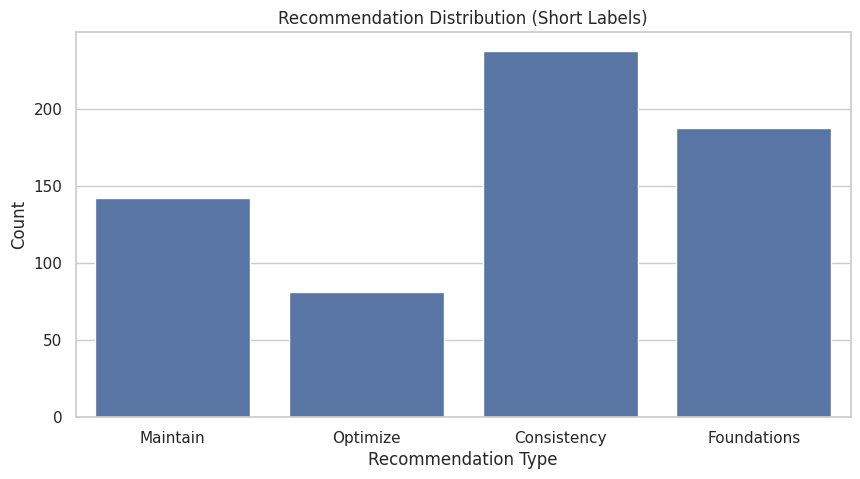

In [35]:
# Count plot per Recommendation
plt.figure(figsize=(10,5))
#shortened the recommendation
df['RecShort'] = df['ClusterID'].map({0:'Maintain',1:'Optimize',2:'Consistency',3:'Foundations'})
sns.countplot(x='RecShort', data=df, order=['Maintain','Optimize','Consistency','Foundations'])
plt.title('Recommendation Distribution (Short Labels)')
plt.xlabel('Recommendation Type')
plt.ylabel('Count')
plt.show()